# 2. Python

We will be using the following PyData Tools for the Exercises:

* Pandas: <http://pandas.pydata.org/>
* NumPy: <http://www.numpy.org/>
* Scikit-Learn: <http://scikit-learn.org/>

This tutorial is based on:


* Wes McKinnedy, Python for Data Analysis, 2nd Editions, <https://github.com/wesm/pydata-book>
* <https://github.com/jonathanrocher/pandas_tutorial/blob/master/analyzing_and_manipulating_data_with_pandas_manual.pdf>




# 2.1 Tutorial

Follow and execute the Examples Notebooks in the Folder:

* Python and iPython Introduction
* Python Data Structures
* Pandas Tour
* NumPy Tour

# 2.2 Practical Exercise

Use the Iris dataset from the scikit-learn Dataset API to solve the following tasks:
1. How many flowers of each kind are in the dataset!
2. What is the average and stdev of all four attributes for all flowers and per flower group?
3. Plot the result!

In [190]:
%matplotlib inline
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [191]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [192]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
target_name          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [193]:
iris_df.groupby('target_name').aggregate({'target_name':'count', })

,target_name
target_name,
setosa,50
versicolor,50
virginica,50


In [197]:
a = iris_df.groupby('target_name').aggregate({'sepal length (cm)':['mean','std'],'sepal width (cm)':['mean','std'],'petal length (cm)':['mean','std'],'petal width (cm)':['mean','std'], })
a.loc['All'] = a.mean()
a

sepal length (cm)           sepal width (cm)            \
                         mean       std             mean       std   
target_name                                                          
setosa               5.006000  0.352490         3.428000  0.379064   
versicolor           5.936000  0.516171         2.770000  0.313798   
virginica            6.588000  0.635880         2.974000  0.322497   
All                  5.843333  0.501513         3.057333  0.338453   

            petal length (cm)           petal width (cm)            
                         mean       std             mean       std  
target_name                                                         
setosa                  1.462  0.173664         0.246000  0.105386  
versicolor              4.260  0.469911         1.326000  0.197753  
virginica               5.552  0.551895         2.026000  0.274650  
All                     3.758  0.398490         1.199333  0.192596

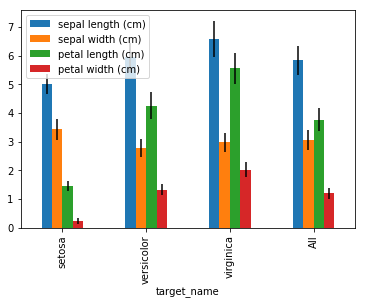

In [198]:
c = iris_df.groupby('target_name').aggregate({'sepal length (cm)':'mean','sepal width (cm)':'mean','petal length (cm)':'mean','petal width (cm)':'mean', })
c.loc['All'] = c.mean()
d = iris_df.groupby('target_name').aggregate({'sepal length (cm)':'std','sepal width (cm)':'std','petal length (cm)':'std','petal width (cm)':'std', })
d.loc['All'] = d.mean()
c.plot.bar(yerr=d)